# Employee Departure Prediction using Machine Learning Algorithms

### Project Objective: Select the best algorithm to predict if an employee is likely to Stay or Leave from the company
### Our Approach:
1. Understand the Data
2. Perform EDA
3. Handle Missing Values/Duplicate values
4. Creating pipelines
5. Try different Machine learning Algorithms
6. Pick the Best performing Model
7. Improve the model by Hyper parameter Tuning
8. Evaluate the results

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings

%matplotlib inline

In [53]:
warnings.filterwarnings('ignore')

### Importing the Data

In [13]:
df = pd.read_csv('employees_departure.csv')

### Exploratory Data Analysis

In [14]:
#  Getting first five records from the dataset

df.head()

,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,0,1002332,1,>30miles,10,63K,65K,4.0,5.0,2,0
1,1,1002333,0,~10miles,7,54K,56K,4.0,4.0,2,0
2,2,1002334,0,<5mile,5,60K,61K,4.0,4.0,3,0
3,3,1002335,0,~15miles,4,59K,60K,5.0,5.0,7,0
4,4,1002336,1,~20miles,6,61K,63K,5.0,5.0,5,0


In [56]:
#  Dropping the unnecessary columns from the dataset

df.drop(['Unnamed: 0', 'RecordId'], axis=1, inplace= True)
df.head()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,1,>30miles,10,63K,65K,4.0,5.0,2,0
1,0,~10miles,7,54K,56K,4.0,4.0,2,0
2,0,<5mile,5,60K,61K,4.0,4.0,3,0
3,0,~15miles,4,59K,60K,5.0,5.0,7,0
4,1,~20miles,6,61K,63K,5.0,5.0,5,0


Eliminating the columns like Unnamed, RecordId which are not required for the analysis

In [57]:
df.dtypes

Gender                int64
Distance             object
YearsWorked           int64
PreviousSalary       object
Salary               object
SelfReview          float64
SupervisorReview    float64
DepartmentCode        int64
Left                  int64
dtype: object

In [58]:
# Changing the PreviousSalary and Salary Columns into ineteger type

df['PreviousSalary'] = df['PreviousSalary'].str.replace('K', '').astype(float)
df['Salary'] = df['Salary'].str.replace('K', '').astype(float)

# Calculating the salary difference abd adding a SalaryDifference column to the dataset
df['SalaryDifference'] = df['Salary'] - df['PreviousSalary']

# Converting SalaryDifference column to object type
df['SalaryDifference'] = df['SalaryDifference'].astype(int).astype(str) + 'K'

# Converting PreviousSalary and Salary Columns again into object type
df['PreviousSalary'] = df['PreviousSalary'].astype(int).astype(str) + 'K'
df['Salary'] = df['Salary'].astype(int).astype(str) + 'K'


In [59]:
df

,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left,SalaryDifference
0,1,>30miles,10,63K,65K,4.0,5.0,2,0,2K
1,0,~10miles,7,54K,56K,4.0,4.0,2,0,2K
2,0,<5mile,5,60K,61K,4.0,4.0,3,0,1K
3,0,~15miles,4,59K,60K,5.0,5.0,7,0,1K
4,1,~20miles,6,61K,63K,5.0,5.0,5,0,2K
...,...,...,...,...,...,...,...,...,...,...
299995,0,>30miles,7,63K,64K,4.0,5.0,2,1,1K
299996,1,~15miles,6,60K,62K,5.0,5.0,2,0,2K
299997,0,~20miles,6,65K,66K,4.0,5.0,6,1,1K
299998,0,<5mile,4,54K,55K,5.0,5.0,2,1,1K


In [60]:
df.dtypes

Gender                int64
Distance             object
YearsWorked           int64
PreviousSalary       object
Salary               object
SelfReview          float64
SupervisorReview    float64
DepartmentCode        int64
Left                  int64
SalaryDifference     object
dtype: object

### Overview of the dataset

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Gender            300000 non-null  int64  
 1   Distance          299735 non-null  object 
 2   YearsWorked       300000 non-null  int64  
 3   PreviousSalary    300000 non-null  object 
 4   Salary            300000 non-null  object 
 5   SelfReview        299416 non-null  float64
 6   SupervisorReview  299424 non-null  float64
 7   DepartmentCode    300000 non-null  int64  
 8   Left              300000 non-null  int64  
 9   SalaryDifference  300000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 22.9+ MB


Getting the information about the each column in the dataset

In [62]:
df.describe()

,Gender,YearsWorked,SelfReview,SupervisorReview,DepartmentCode,Left
count,300000.000000,300000.000000,299416.000000,299424.000000,300000.000000,300000.000000
mean,0.401043,7.003120,4.399084,4.101308,3.997480,0.231833
std,0.490111,1.867817,0.663330,0.943972,2.161085,0.422004
min,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000
25%,0.000000,6.000000,4.000000,4.000000,2.000000,0.000000
50%,0.000000,7.000000,4.000000,4.000000,3.000000,0.000000
75%,1.000000,8.000000,5.000000,5.000000,6.000000,0.000000
max,1.000000,14.000000,5.000000,5.000000,7.000000,1.000000


In [63]:
#  Getting the count of null values in each column
df.isnull().sum()

Gender                0
Distance            265
YearsWorked           0
PreviousSalary        0
Salary                0
SelfReview          584
SupervisorReview    576
DepartmentCode        0
Left                  0
SalaryDifference      0
dtype: int64

In [64]:
df['Left'].value_counts()

Left
0    230450
1     69550
Name: count, dtype: int64

In [65]:
employee_left = df['Left'].value_counts()
total = employee_left.sum()
per_employee_left = (employee_left / total) * 100

In [66]:
print("The percentage of the employees who stayed vs left:\n ", per_employee_left)

The percentage of the employees who stayed vs left:
  Left
0    76.816667
1    23.183333
Name: count, dtype: float64


- The count of employees who does not left the company (0) has 230450 values and the employees who lef the job (1) was 69550.
- By looking at the target variable counts we can clearly say that the data is imbalanced. 

<Axes: >

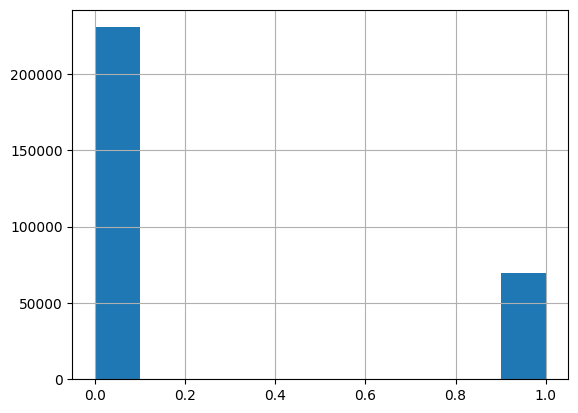

In [67]:
df['Left'].hist()

By observing the above graph we can obsever theres a impbalce between both the 1's and 0's

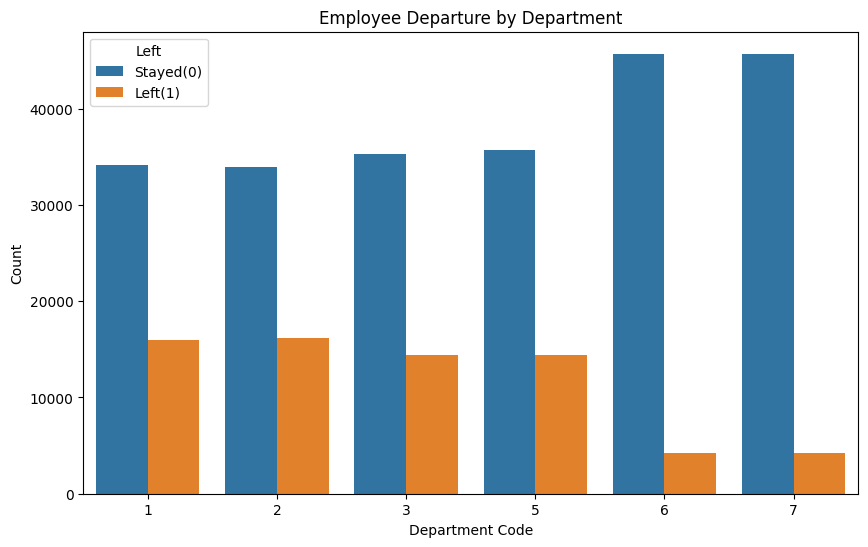

In [68]:
# sns.countplot(data = df, x = 'DepartmentCode', hue = 'Left')

plt.figure(figsize=(10, 6))
sns.countplot(data= df, x= 'DepartmentCode', hue= 'Left')
plt.title('Employee Departure by Department')
plt.xlabel('Department Code')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed(0)', 'Left(1)'])
plt.show()

### Correaltion Analysis

In [69]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate correlation with target variable 'Left'
left_correlation = df[numerical_columns].corr()['Left'].drop('Left')
print("Correlation with 'Left':")
print(left_correlation)

Correlation with 'Left':
Gender             -0.080043
YearsWorked        -0.060786
SelfReview          0.157590
SupervisorReview   -0.249545
DepartmentCode     -0.216110
Name: Left, dtype: float64


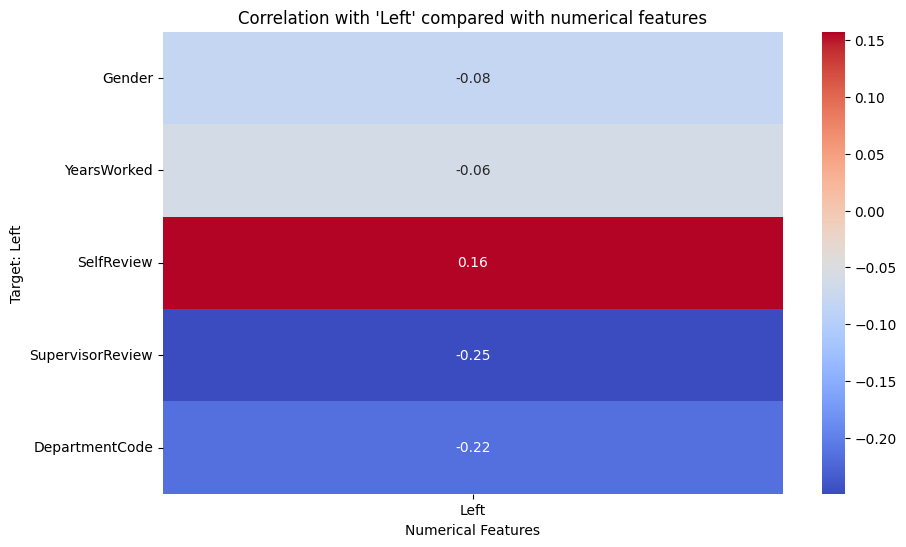

In [70]:
plt.figure(figsize=(10, 6))
sns.heatmap(left_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with 'Left' compared with numerical features")
plt.xlabel("Numerical Features")
plt.ylabel("Target: Left")
plt.show()

- SupervisorReview appears to have the strongest negative correlation with Left at -0.25. This means that employees who received higher supervisor reviews were less likely to leave the company.
- DepartmentCode also appears to have a negative correlation with Left at -0.22. This means that employees who worked in certain departments were less likely to leave the company.
- SelfReview appears to have a weak positive correlation with Left at 0.16. This means that employees who gave themselves higher self-reviews were slightly more likely to leave the company.
- Gender, YearsWorked do not appear to have a significant correlation with Left.

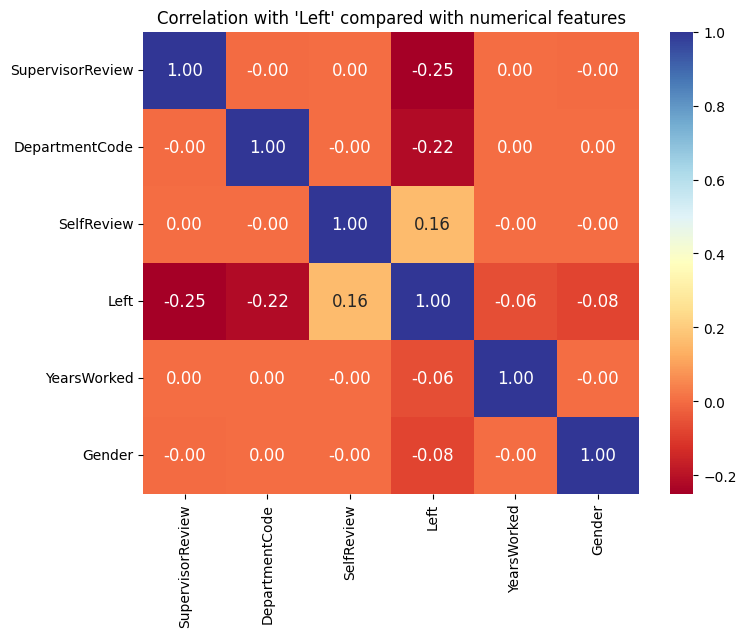

In [71]:
selected_columns = ['SupervisorReview', 'DepartmentCode', 'SelfReview', 'Left', 'YearsWorked', 'Gender']
selected_data = df[selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation with 'Left' compared with numerical features")
plt.show()

### Separating features X and y

In [72]:
# Separate features (X) and target variable (y)

# Features
X = df.drop(columns=['Left'])  

# Target variable
y = df['Left']  

### Preprocessing the data

In [73]:
# Creating a list for numerical features and Categoricl features

num_features = ['YearsWorked', 'SelfReview', 'SupervisorReview', 'DepartmentCode']
cat_features = ['Distance', 'PreviousSalary', 'Salary', 'SalaryDifference']

### Creating Pipelines

In [74]:
#pipeline for numerical values
#where the missing values are replaced by median
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])
num_pipeline

Pipeline(steps=[('impute_missing', SimpleImputer(strategy='median')),
                ('standardize_num', StandardScaler())])

In [75]:
#pipeline for categorical values
#missing values are replaced by most frequent values

cat_pipeline = Pipeline(steps=[ ('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                                 ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore')) ])

cat_pipeline

Pipeline(steps=[('impute_missing_cats',
                 SimpleImputer(strategy='most_frequent')),
                ('create_dummies_cats',
                 OneHotEncoder(handle_unknown='ignore'))])

In [76]:
#preprocessing both the pipelines
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features)
])
preprocessing_pipeline

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['YearsWorked', 'SelfReview',
                                  'SupervisorReview', 'DepartmentCode']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Distance', 'PreviousSalary', 'Salary',
                                  'SalaryDifference'])])

### Steps that are followed
1. separated numerical and catergorical features
2. created separate pipelines for both the featues to handle the missing values
3. combained both the pipelines

### Splitting the dataset for analysis

In [77]:
# Split the dataset into training and testing sets
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)


In [78]:
preprocessing_pipeline.fit_transform(X_train)

<240000x72 sparse matrix of type '<class 'numpy.float64'>'
	with 1920000 stored elements in Compressed Sparse Row format>

## Machine Learning Models

#### Logistic Regression Model

In [79]:
#Logistic Regression

lr_model_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('lr_model', LogisticRegression())
])

lr_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['YearsWorked', 'SelfReview',
                                                   'SupervisorReview',
                                                   'DepartmentCode']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Distance', 'PreviousSalary',
                                                   'Salary',
                                                   'SalaryDifference'])])),
                ('lr_model', LogisticRegression())])

In [80]:
y_pred_train = lr_model_pipeline.predict(X_train)
y_pred_test = lr_model_pipeline.predict(X_test)

In [81]:
training_accuracy = accuracy_score(y_train, y_pred_train)
testing_accuracy = accuracy_score(y_test, y_pred_test)
print("Training Accuracy :", training_accuracy)
print("Testing Accuracy :", testing_accuracy)

Training Accuracy : 0.8135458333333333
Testing Accuracy : 0.8137666666666666


In [82]:
print(classification_report(y_test, y_pred_test.round()))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89     46096
           1       0.66      0.41      0.51     13904

    accuracy                           0.81     60000
   macro avg       0.75      0.67      0.70     60000
weighted avg       0.80      0.81      0.80     60000



- On the testing dataset, the logistic regression model attained an accuracy of approximately 81%, which is acceptable for this problem. However, with an accuracy of 81%, the model misclassifies around 19% of the occurrences.
- With an F1-score of 89% for class 0, it indicates a good balance between precision and recall for employees who didn't left. This suggests that the model's performance in correctly identifying instances of employees staying is relatively high.
- This indicates that the model's ability to correctly identify instances of employees departing is limited, suggesting potential room for improvement by exploring other machine learning models.
- As there is an imbalanced distribution among the target variable, it is better to go with the f1-score instead of accuracy.

### Decision Tree Model

In [83]:

dt_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('dt_model', DecisionTreeClassifier())
])

In [84]:
dt_param_grid = [
  {
   'dt_model__max_depth': [2, 5, 10, 15],
   'dt_model__min_samples_split':[3, 5, 10, 20],
   'dt_model__min_samples_leaf': [2, 5],
   'dt_model__class_weight':[None]
  }
 ]

scoring = 'f1'


In [85]:
dt_gc = GridSearchCV(estimator=dt_model_pipeline, param_grid=dt_param_grid, cv=5, scoring=scoring)

In [86]:
dt_gcv_results = dt_gc.fit(X_train, y_train)

In [87]:
dt_gcv_results.best_params_

{'dt_model__class_weight': None,
 'dt_model__max_depth': 10,
 'dt_model__min_samples_leaf': 2,
 'dt_model__min_samples_split': 20}

In [88]:
training_accuracy = dt_gcv_results.score(X_train, y_train)
testing_accuracy = dt_gcv_results.score(X_test, y_test)

In [89]:
print("Decision Tree training accuracy: ",training_accuracy)
print("Decision Tree testing accuracy: ",testing_accuracy)

Decision Tree training accuracy:  0.7959154218084722
Decision Tree testing accuracy:  0.793799525709989


In [90]:
y_pred = dt_gcv_results.predict(X_test)
print (classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     46096
           1       0.66      0.99      0.79     13904

    accuracy                           0.88     60000
   macro avg       0.83      0.92      0.86     60000
weighted avg       0.92      0.88      0.89     60000



- The high f1-score for class 0 indicates that the model performs well in correctly identifying instances of class 0 while maintaining a good balance between precision and recall.
- Recall for class 1 is relatively high at 0.99, indicating that the model effectively captures the majority of instances belonging to class 1.
- The f1-scores for both classes are reasonable, with class 0 at 0.92 and class 1 at 0.79, suggesting a good balance between precision and recall for each class.
- Choosing best metric as __f1-score__ over accuracy as the data is more imbalanced.

### Random Forest Model

In [91]:
rf_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('rf_model', RandomForestClassifier())
])

In [92]:
rf_param_grid = [
  {
        'rf_model__max_depth': [5, 8, 10, 12],
        'rf_model__n_estimators': [10, 50, 100],
        'rf_model__class_weight': [None],
        'rf_model__max_samples': [1000, 2000, 5000]
   }
]
scoring = 'f1'

In [93]:
rf_gc = GridSearchCV(estimator=rf_model_pipeline, param_grid=rf_param_grid, cv=5, scoring=scoring)

In [94]:
rf_gcv_results = rf_gc.fit(X_train, y_train)

In [95]:
rf_gcv_results.best_params_

{'rf_model__class_weight': None,
 'rf_model__max_depth': 12,
 'rf_model__max_samples': 5000,
 'rf_model__n_estimators': 10}

In [96]:
training_accuracy = rf_gcv_results.score(X_train, y_train)
testing_accuracy = rf_gcv_results.score(X_test, y_test)

In [97]:
print("Random Forest training accuracy: ",training_accuracy)
print("Random Forest testing accuracy: ",testing_accuracy)

Random Forest training accuracy:  0.5838985179603114
Random Forest testing accuracy:  0.5799571770435368


In [98]:
y_pred = rf_gcv_results.predict(X_test)
print (classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     46096
           1       0.70      0.50      0.58     13904

    accuracy                           0.83     60000
   macro avg       0.78      0.72      0.74     60000
weighted avg       0.82      0.83      0.82     60000



- The f1-score is a more reliable metric than accuracy in imbalanced datasets because it strikes a compromise between precision and recall, both of which are important when the class distribution is unequal.
- Class 0 has a high f1-score (0.89), which suggests that the majority class was successfully identified. However, in imbalanced datasets, the performance of the model on minority classes is frequently less clear.
- The f1-score for class 1 is much lower (0.54), indicating difficulties in correctly identifying the minority class, which is a common problem in imbalanced datasets and a significant area for model improvement.
- Since the model tends to predict the majority class, accuracy can be misleadingly high in this situation. In contrast, F1-score penalizes the model for not performing well in both classes

### Decision Tree with best Parameters

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

dt_best_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('dt_model', DecisionTreeClassifier(class_weight=None,
                                  max_depth=10,
                                  min_samples_leaf=2,
                                  min_samples_split=20))
])

In [100]:
dt_best_pipeline.fit(X_train, y_train)
y_pred = dt_best_pipeline.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     46096
           1       0.66      0.99      0.79     13904

    accuracy                           0.88     60000
   macro avg       0.83      0.92      0.86     60000
weighted avg       0.92      0.88      0.89     60000



### Random Forest with best Parameters

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

rf_best_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('rf_model', RandomForestClassifier(class_weight=None,
                                  max_depth=12,
                                  max_samples=5000,
                                  n_estimators=50))
])

In [102]:
rf_best_pipeline.fit(X_train, y_train)
y_pred = rf_best_pipeline.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     46096
           1       0.72      0.42      0.53     13904

    accuracy                           0.83     60000
   macro avg       0.78      0.68      0.71     60000
weighted avg       0.82      0.83      0.81     60000



### Conclusion

- After thorough preprocessing and evaluation of various machine learning models, this project focused on developing predictive models for employee departure using a dataset containing information about employees who have left the organization that which highlights random forest and decision tree models as top performers.
- Based on the F1-score for Class 1, the Decision Tree model significantly outperforms the Random Forest model and for Class 0 there is a very slight edge for the Decision Tree
- As this is imbalanced data the best metric to choose is the f1- score. Decision Tree slightly outperforms in accuracy and f1-score on an imbalanced dataset.

This analysis provides a basis for organizations to detect potential attrition risks and take proactive measures to tackle employee retention issues. This initiative aims to cultivate a supportive workplace environment and preserve valuable talent within the organization.